In [34]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [35]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

In [36]:
saved_style_state = matplotlib.rcParams.copy()

In [37]:
if os.path.isfile("opal_dataset.csv"):
    filepath = "opal_dataset.csv"
    print "loading from file"
else:
    filepath = "https://opendata.transport.nsw.gov.au/node/1640/download/time-loc_20160808-14.csv"
    print "loading from the internet"
    #if this url does not work,
    #make sure the opal_dataset.csv file is present in the same folder as this notebook

opal_data = pd.read_csv(filepath)
print "done"

loading from file
done


In [38]:
opal_data.head()

,mode,date,tap,time,loc,count
0,bus,20160809.0,on,02:30,2000,81.0
1,bus,20160809.0,on,13:30,2095,93.0
2,bus,20160809.0,on,13:30,2097,33.0
3,bus,20160809.0,on,13:30,2090,22.0
4,bus,20160809.0,on,13:30,2093,19.0


In [39]:
import requests, json 

def post_getter(postcode):
    '''Function to convert postcode into location name'''
    
    url = "http://v0.postcodeapi.com.au/suburbs/" + str(postcode) + ".json"
    
    getter = requests.get(url)
    
    data = json.loads(getter.text)
    
    return data[0]["name"]
    #indexing into json to give me the name only


buslist = [2000, 2150, 2022, 2031, 2010]
burblist = []
#list of required postcodes and a new suburb list

for i in buslist:
    result = post_getter(i)
    burblist.append(result)
#loop that appends the actual postcode name to burblist
    
burblist
#returning the list to check that it worked
    

[u'The Rocks', u'Harris Park', u'Queens Park', u'Clovelly', u'Surry Hills']

In [40]:
opal_data["loc_con"] = opal_data[(opal_data['mode'] =='bus') & (opal_data['loc'] != '-1')]["loc"].head().apply(post_getter)
#applying post_getter function as a new column in opal_data.head
opal_data.head()

,mode,date,tap,time,loc,count,loc_con
0,bus,20160809.0,on,02:30,2000,81.0,The Rocks
1,bus,20160809.0,on,13:30,2095,93.0,Manly
2,bus,20160809.0,on,13:30,2097,33.0,Collaroy
3,bus,20160809.0,on,13:30,2090,22.0,Cremorne Junction
4,bus,20160809.0,on,13:30,2093,19.0,Balgowlah


In [41]:
bus_1 = opal_data[(opal_data['mode'] =='bus') & (opal_data['loc'] != '-1') 
                    & (opal_data['tap'] =='on') & (opal_data['date'] == 20160809.0)]
#filtering out the opal_data by bus, tap, date, and removing -1 values
bus_1

,mode,date,tap,time,loc,count,loc_con
0,bus,20160809.0,on,02:30,2000,81.0,The Rocks
1,bus,20160809.0,on,13:30,2095,93.0,Manly
2,bus,20160809.0,on,13:30,2097,33.0,Collaroy
3,bus,20160809.0,on,13:30,2090,22.0,Cremorne Junction
4,bus,20160809.0,on,13:30,2093,19.0,Balgowlah
5,bus,20160809.0,on,13:30,2099,86.0,NaN
6,bus,20160809.0,on,13:30,2528,201.0,NaN
7,bus,20160809.0,on,13:30,2154,44.0,NaN
8,bus,20160809.0,on,13:30,2155,57.0,NaN
9,bus,20160809.0,on,13:30,2150,322.0,NaN


In [42]:
new_columns = bus_1.groupby ("loc")['count'].sum()
#creating new columns that are grouped by the location and tap count sum

In [43]:
sorted_0 = new_columns.sort_values(ascending = False)
#sorting tap values from highest to lowest

In [44]:
sorted_0.sum()
#getting the total sum of all tap counts

887124.0

In [45]:
top_count = sorted_0.head(5)
top_count_df = top_count.to_frame()
burb_names = pd.Series(burblist)
#getting the top 5 values and creating a new series of suburb names

In [46]:
top_count_df['Location'] = burb_names.values
top_count_df

,count,Location
loc,,
2000,147922.0,The Rocks
2150,26579.0,Harris Park
2022,21241.0,Queens Park
2031,21134.0,Clovelly
2010,18059.0,Surry Hills


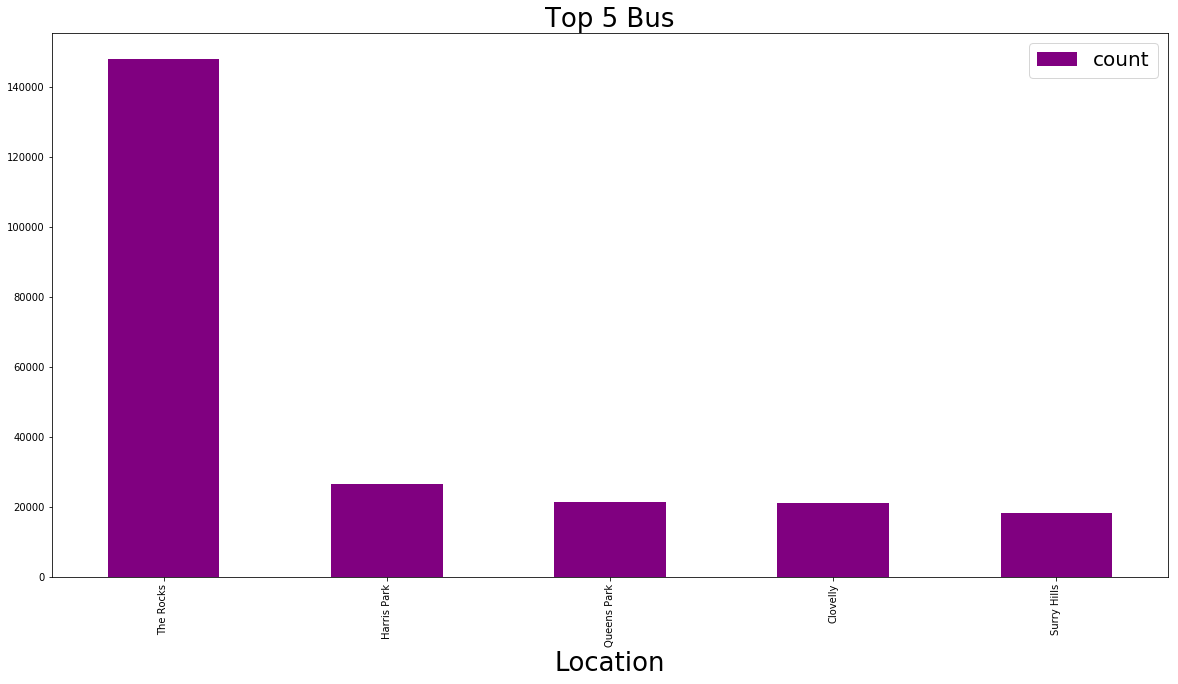

In [47]:
top_count_df[top_count_df['count'] > 0].plot.bar(x='Location', y='count', facecolor = 'purple')
plt.xlabel('Location', fontsize=26)
plt.title('Top 5 Bus', fontsize=26)
plt.legend(prop={'size':20})
#plotting bar graph by location and count values, adding and resizing labels

In [48]:
train_2 = opal_data[(opal_data['mode'] =='train') & (opal_data['loc'] != '-1') & (opal_data['tap'] =='on') & (opal_data['date'] == 20160809.0)]

In [49]:
new_columns_2 = train_2.groupby("loc")["count"].sum()

In [50]:
sorted_2 = new_columns_2.sort_values(ascending = False)

In [51]:
sorted_2.sum()

1206743.0

In [52]:
top_count_2 = sorted_2.head(5)
top_count_df_2 = top_count_2.to_frame()
top_count_df_2

,count
loc,
Central Station,115886.0
Town Hall Station,109077.0
Wynyard Station,78154.0
Parramatta Station,36754.0
North Sydney Station,31449.0


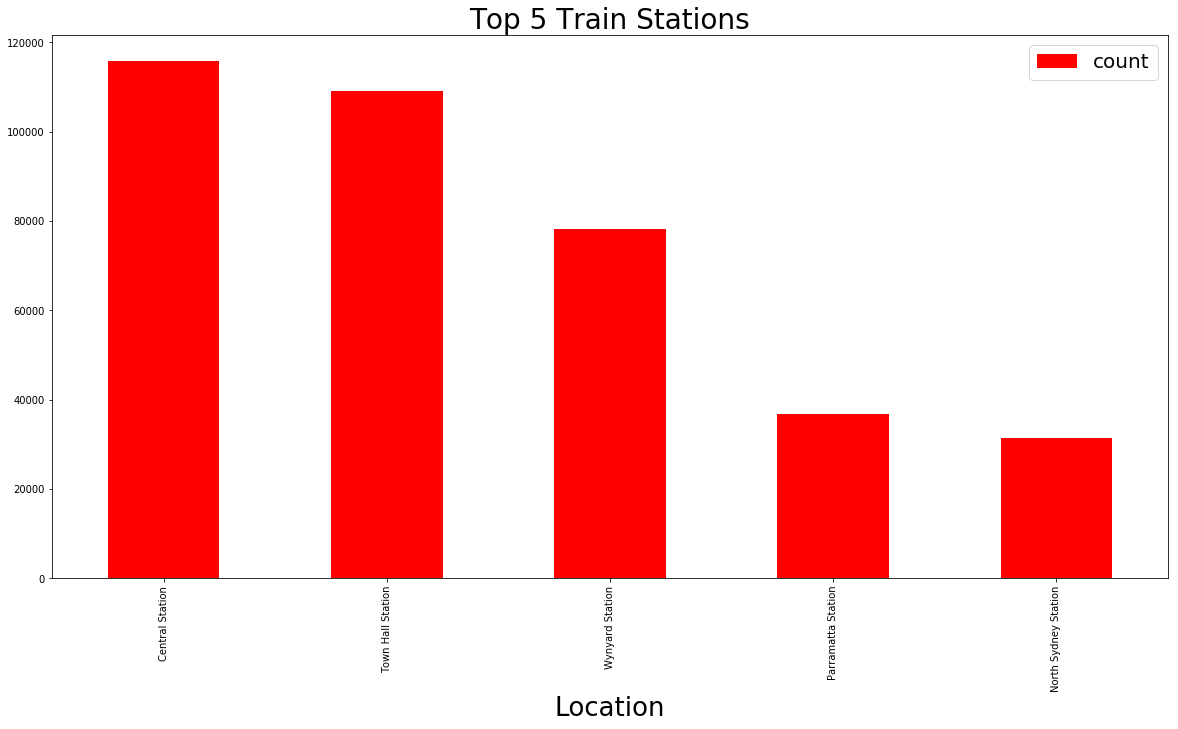

In [53]:
top_count_df_2[top_count_df_2['count'] > 0].plot.bar(y='count', facecolor = 'red')
plt.title('Top 5 Train Stations', fontsize=28)
plt.xlabel('Location', fontsize=26)
plt.legend(prop={'size':20})

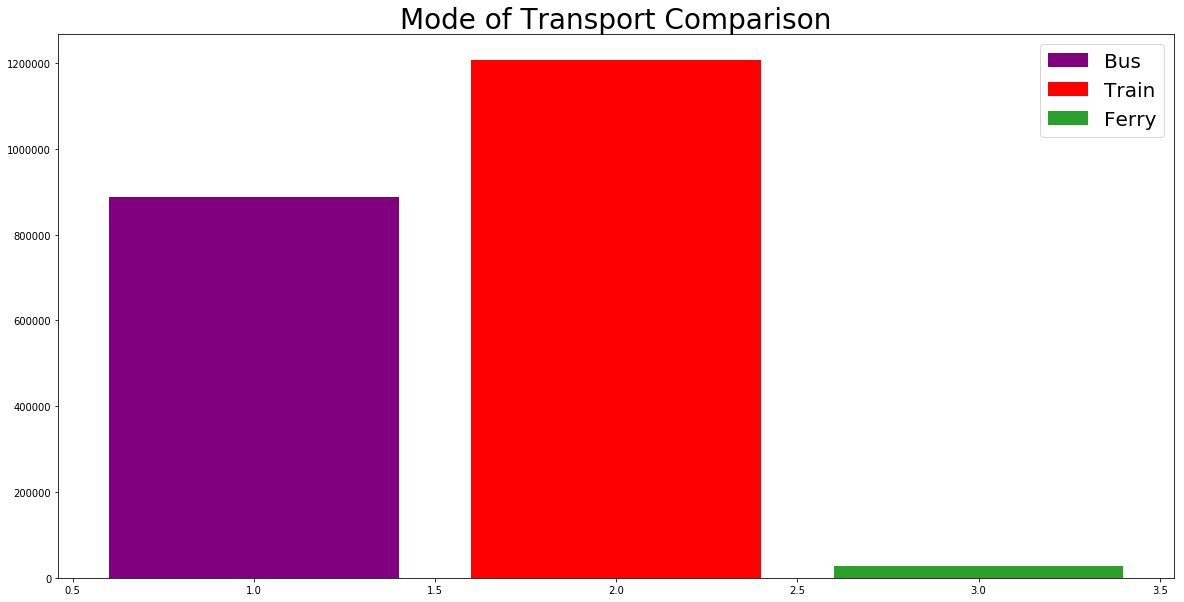

In [54]:
x = [1]
x2 = [2]
x3 = [3]
y = [887124]
y2 = [1206743]
y3 = [28037]
plt.bar(x, y, label='Bus', facecolor = 'purple')
plt.bar(x2, y2, label='Train', facecolor = 'red')
plt.bar(x3, y3, label='Ferry')
plt.title('Mode of Transport Comparison', fontsize=28)
plt.legend(prop={'size':20})
#plotting a comparative bar graph comparing different modes of transport

In [55]:
ferry_3 = opal_data[(opal_data['mode'] =='ferry') & (opal_data['loc'] != '-1') & (opal_data['tap'] =='on') & (opal_data['date'] == 20160809.0)]
ferry_3

,mode,date,tap,time,loc,count,loc_con
213220,ferry,20160809.0,on,19:00,Manly Wharf,33.0,NaN
213221,ferry,20160809.0,on,19:00,Circular Quay No. 5 Wharf,28.0,NaN
213222,ferry,20160809.0,on,19:00,Circular Quay No. 3 Wharf,25.0,NaN
213223,ferry,20160809.0,on,19:00,Darling Harbour Wharf 3,21.0,NaN
213224,ferry,20160809.0,on,13:30,Queens Wharf,19.0,NaN
213225,ferry,20160809.0,on,13:30,Circular Quay No. 5 Wharf,55.0,NaN
213226,ferry,20160809.0,on,13:30,Circular Quay No. 3 Wharf,88.0,NaN
213227,ferry,20160809.0,on,13:30,Circular Quay No. 4 Wharf,42.0,NaN
213228,ferry,20160809.0,on,13:30,Watsons Bay Wharf,64.0,NaN
213229,ferry,20160809.0,on,13:30,Taronga Zoo Wharf,25.0,NaN


In [56]:
new_columns_3 = ferry_3.groupby("loc")["count"].sum()

In [57]:
sorted_3 = new_columns_3.sort_values(ascending = False)

In [58]:
sorted_3.sum()

28037.0

In [59]:
top_count_3 = sorted_3.head(5)
top_count_df_3 = top_count_3.to_frame()
top_count_df_3

,count
loc,
Circular Quay No. 3 Wharf,5079.0
Manly Wharf,4776.0
Circular Quay No. 5 Wharf,3264.0
Circular Quay No. 4 Wharf,2764.0
Circular Quay No. 2 Wharf,2702.0


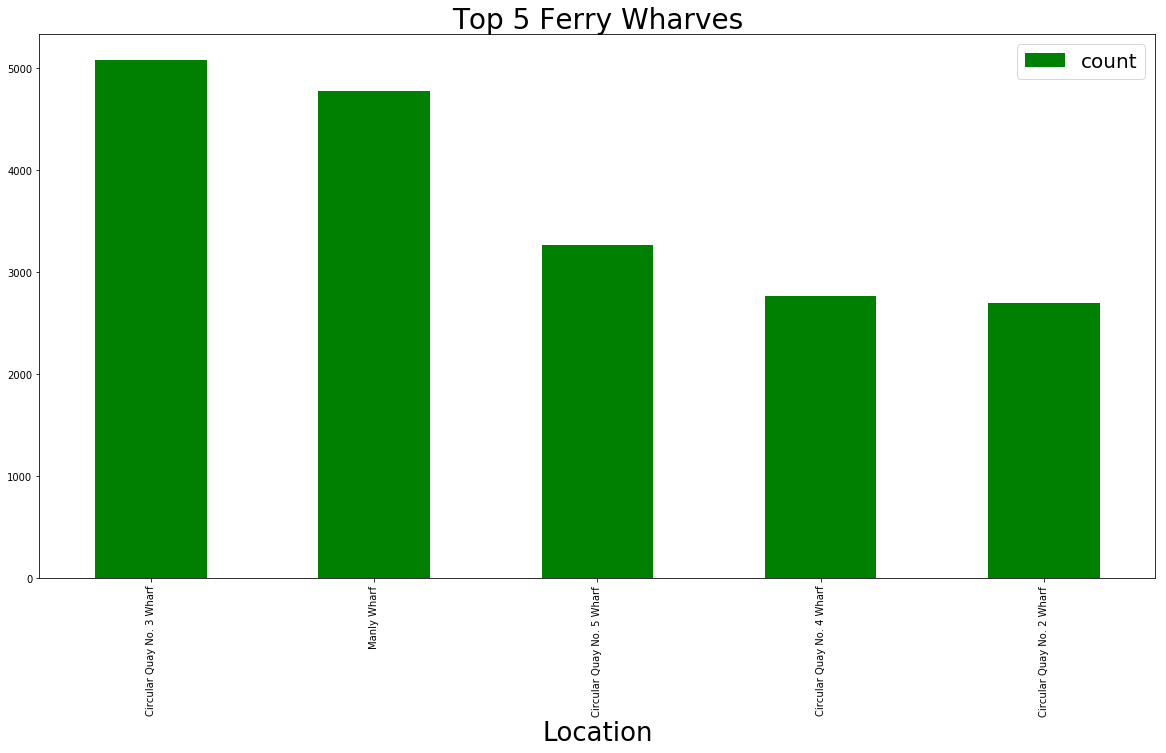

In [60]:
top_count_df_3[top_count_df_3['count'] > 0].plot.bar(y='count', facecolor = 'green')
plt.title('Top 5 Ferry Wharves', fontsize=28)
plt.xlabel('Location', fontsize=26)
plt.legend(prop={'size':20})